In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

2023-01-29 21:17:51.176832: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [4]:
model = C.Helper.load_unet('/raid/psych/CACTAS/unet_full_33_cases_weights.hdf5')

2023-01-29 21:18:18.340954: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-01-29 21:18:18.346442: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-01-29 21:18:18.852179: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-01-29 21:18:18.852236: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-01-29 21:18:18.852243: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-01-29 21:18:18.859974: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1418] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 38425 MB memory) -> physical GPU (device: 0, name: A100-SXM4-40GB, pci bus id: 0000:47:00.0, compute capabili

In [5]:
TEST_DATA = '/raid/mpsych/CACTAS/DATA/Nathan_Test/'
TEST_DATA_OUT = '/raid/mpsych/CACTAS/DATA/Nathan_Test_Predicted/'
TEST_DATA_IGNORE = ['41','51','61'] # z-spacing different

In [6]:
import os
TEST_SCANS = sorted(os.listdir(TEST_DATA))

In [7]:
TEST_SCANS[0]

'ESUS 10'

In [8]:
image, label = C.Util.load(0, datapath=TEST_DATA)

In [9]:
c_i, c_l = C.Util.crop(image, label, target_size=64)

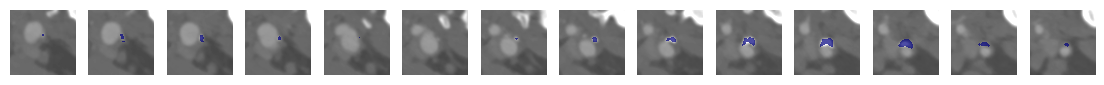

In [10]:
C.Util.view(c_i, c_l)

In [11]:
label_pred = np.zeros(label.shape, dtype=bool)
label_pred[:,:,:] = 0


In [25]:
image_n = image.copy()
image_n = C.Util.normalize(image_n)

In [34]:
THRESHOLD = 0.99999

In [46]:
total_time = 0
for z in range(image.shape[2]):

    t0 = time.time()
    
    if (label[:,:,z].max() == 0):
#         print('skipping', z)
        continue
    

    cur_slice = image_n[:,:,z]
    
    thresholded = cur_slice.copy()
    thresholded[cur_slice < 130] = 0
    thresholded[cur_slice < 1800] = 0
    
    cur_slice = thresholded
    
    print('not skipping', z)

    cur_slice_pred = model.predict(cur_slice.reshape(1,512,512,1))

    cur_slice_pred = C.Util.binarize(cur_slice_pred[0,:,:,0], threshold=THRESHOLD)

    label_pred[:,:,z] = cur_slice_pred

    total_time += time.time()-t0

not skipping 99
not skipping 100
not skipping 101
not skipping 102
not skipping 103
not skipping 105
not skipping 106
not skipping 107
not skipping 108
not skipping 109
not skipping 110
not skipping 111
not skipping 112


In [47]:
c_i, c_l = C.Util.crop(image, label_pred, target_size=64)

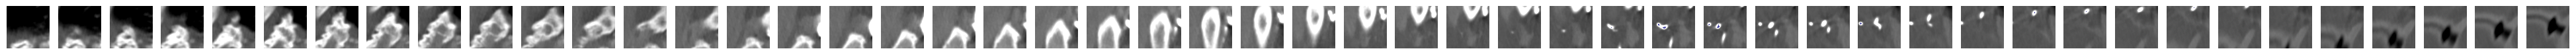

In [48]:
C.Util.view(c_i, c_l)

In [42]:
image.max()

3071